In [4]:
from textblob import TextBlob
import pandas as pd

In [9]:
from textblob import TextBlob

def getSubjectivity(review) :
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review) :
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
df = pd.read_csv('processed_data_g20.csv')
df.head()

final_data = pd.DataFrame(df[['date', 'username', 'tweet']])
final_data.head()

,date,username,tweet
0,2022-10-02 06:00:00,orfonline,the importance of infrastructure required for ...
1,2022-10-02 04:30:00,ORFMumbai,the importance of infrastructure required for ...
2,2022-10-02 03:48:38,AlanAbdo13,ukraine has urged australia tapi be a part of ...
3,2022-10-02 02:52:15,HerculesGuy1,white house adviser ivanka trump was present a...
4,2022-10-02 01:57:30,horbra7,trump and putin meet at g20 summit shorts what...


In [22]:
final_data[ 'Subjectivity'] = final_data['tweet'].apply(getSubjectivity)
final_data['Polarity'] = final_data['tweet'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head()

final_data.to_csv('sentiment_analysis_data_g20.csv', index=False)

In [19]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Positive    87
Neutral     84
Negative    15
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x1e905e9b1f0>,
 [Text(0.11128515088098115, 1.0943562560671902, 'Positive'),
  Text(-0.382035815514551, -1.031527331515812, 'Neutral'),
  Text(1.306904081342823, -0.33838103104262784, 'Negative')],
 [Text(0.06070099138962608, 0.5969215942184672, '46.8%'),
  Text(-0.208383172098846, -0.5626512717358975, '45.2%'),
  Text(0.8228655326973331, -0.21305472324906194, '8.1%')])

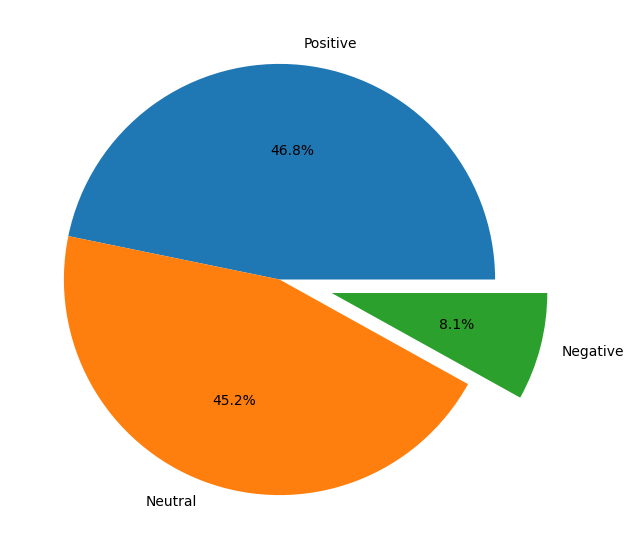

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)
